In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train-chennai-sale.csv")
pd.set_option("display.max_columns", None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

### Replacing the missing values

#### N_BEDROOM

In [5]:
df["N_BEDROOM"].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [6]:
df["N_BEDROOM"] = df["N_BEDROOM"].replace(np.nan, 1) #most frequent value i.e mode

#### N_BATHROOM

In [7]:
df["N_BATHROOM"].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [8]:
df["N_BATHROOM"] = df["N_BATHROOM"].replace(np.nan, 1) #most frequent value

#### QS_OVERALL

<AxesSubplot:xlabel='QS_OVERALL'>

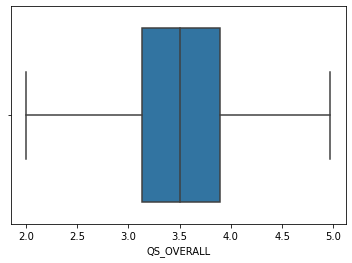

In [9]:
#Before imputing QS_OVERALL with mean we need to check for any outliers as mean is more senstive to outliers.
sns.boxplot(x = 'QS_OVERALL', data = df)

In [10]:
print("Mean  :",round(df.QS_OVERALL.mean(),3))  # average

Mean  : 3.503


In [11]:
df["QS_OVERALL"] = df["QS_OVERALL"].replace(np.nan, 3.503)
#df.loc[[15]]

### Converting the datatype of some Features to integer as per logic


In [12]:
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)

### Dealing with errors & mistakes present in categorical features

In [13]:
## Checking the labels in categorical features
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


Key Observations

- AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL,STREET - have some errors, which needs correction

In [14]:
## Renaming the inappropriately given names
df = df.apply(lambda x: x.replace({'Adyr':'Adyar', 'TNagar': 'T Nagar',
     'Chrompt': 'Chrompet', 'Chrmpet':'Chrompet', 'Chormpet': 'Chrompet',
     'Ann Nagar': 'Anna Nagar',  'Ana Nagar': 'Anna Nagar',
     'Velchery': 'Velachery', 'KKNagar': 'KK Nagar',
     'Karapakam':'Karapakkam', 'Ab Normal': 'AbNormal',
     'Partiall':'Partial', 'PartiaLl': 'Partial',
     'AdjLand': 'Adj Land', 'Noo': 'No',
     'Comercial':'Commercial', 'Others': 'Other',
     'AllPub': 'All Pub', 'NoSewr ':'NoSeWa',
     'NoAccess': 'No Access', 'Pavd':'Paved'}, regex=True))

## Checking the modifications done to names in each feature variable
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'Adj Land' 'Normal Sale']

PARK_FACIL
['Yes' 'No']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Other' 'House']

UTILITY_AVAIL
['All Pub' 'ELO' 'NoSeWa']

STREET
['Paved' 'Gravel' 'No Access']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [15]:
## Stastical Description of th DataFrame
df.describe().round(0)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.0,7109.0,7109.0,7109.0,7109.0,7109.0,7109.0,7109.0,7109.0,7109.0,7109.0,7109.0
mean,1382.0,100.0,2.0,1.0,4.0,4.0,4.0,3.0,4.0,376938.0,141006.0,10894910.0
std,457.0,57.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,143071.0,78768.0,3768603.0
min,500.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,71177.0,5055.0,2156875.0
25%,993.0,50.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,272406.0,84219.0,8272100.0
50%,1373.0,99.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,349486.0,127628.0,10335050.0
75%,1744.0,148.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,451562.0,184506.0,12993900.0
max,2500.0,200.0,4.0,2.0,6.0,5.0,5.0,5.0,5.0,983922.0,495405.0,23667340.0


### Analyse the Sales Price using Different Features:

#### 1. Age of the House

In [16]:
## The two date columns - DATE_SALE & DATE_BUILD are in object data type
## Convert them into DateTime data type
df['DATE_SALE'] = pd.to_datetime(df.DATE_SALE)
df['DATE_BUILD'] = pd.to_datetime(df.DATE_BUILD)
df[['DATE_SALE', 'DATE_BUILD']].head()

,DATE_SALE,DATE_BUILD
0,2011-04-05,1967-05-15
1,2006-12-19,1995-12-22
2,2012-04-02,1992-09-02
3,2010-03-13,1988-03-18
4,2009-05-10,1979-10-13


In [17]:
## Create a new column to determine the age of property
df['PROP_AGE'] = pd.DatetimeIndex(df['DATE_SALE'] ).year - pd.DatetimeIndex(df['DATE_BUILD']).year
df['PROP_AGE'].head()

0    44
1    11
2    20
3    22
4    30
Name: PROP_AGE, dtype: int64

[Text(0.5, 1.0, 'Sales Price Trend by House Age & Area')]

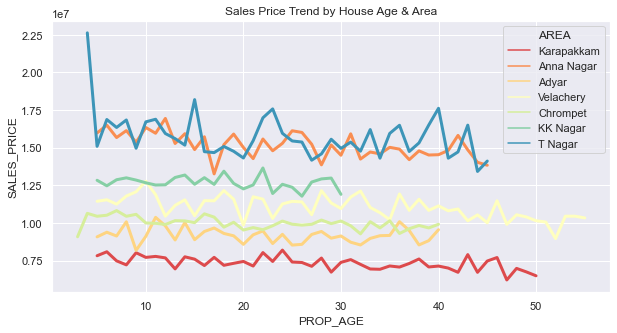

In [18]:
## Sales Price by House Age (we put Area as hue)
plt.figure(figsize=(10,5))
sns.set_theme()
sns.lineplot(data=df, x = "PROP_AGE", y = "SALES_PRICE", hue="AREA", style="AREA", palette= "Spectral", ci=None, linewidth=3, dashes=False).set(title='Sales Price Trend by House Age & Area')

Observations:
- There is a slight decrease in price with increase in age of the property.
- Velachery & Karapakkam have some of the oldest properties, some are greater than 50 years.
- Karapakkam has lowest priced properties

### 2. Year of Sale

In [19]:
# YEAR_SALE column is created by extracting year from DATE_SALE column
df['YEAR_SALE'] = pd.DatetimeIndex(df.DATE_SALE).year

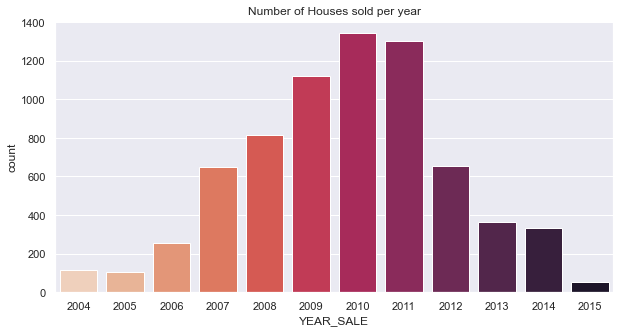

In [20]:
## Number of houses sold each year
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='YEAR_SALE', palette='rocket_r')
plt.title("Number of Houses sold per year")
plt.show()

- Highest number of houses were sold in 2010, followed by 2011 and 2009. Reduction in property prices during this time due to the financial crisis might have encouraged more buyers.

- Least number of houses were sold in 2004, 2005, and 2015.

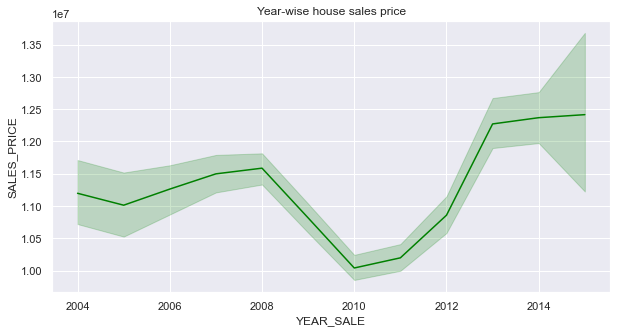

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='YEAR_SALE', y='SALES_PRICE', color='green')
plt.title("Year-wise house sales price")
plt.show()

- The dataset contains records of sales price of houses in Chennai from 2004 to 2015.
- A small decrease in house price is noticed around 2004-2005. This might have been caused due to the 2004 Tsunami because the coastal region of Chennai was affected.
- There's a sharp decrease in sales price from 2008-2010. This was caused by the global financial crisis in 2008. This instability in the economic market lasted for 4 to 5 years.

### 3. Area & Built type

<AxesSubplot:xlabel='BUILDTYPE', ylabel='count'>

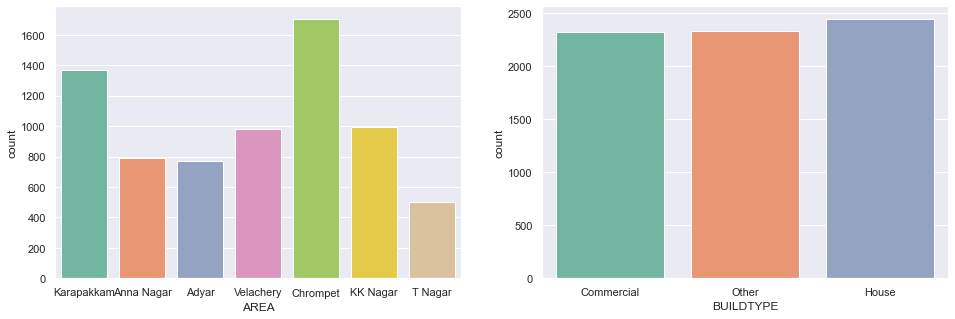

In [22]:
plt.figure(figsize=(16,5))
sns.set_theme()

plt.subplot(1,2,1)
sns.countplot(data=df, x="AREA", palette="Set2")

plt.subplot(1,2,2)
sns.countplot(data=df, x="BUILDTYPE", palette="Set2")

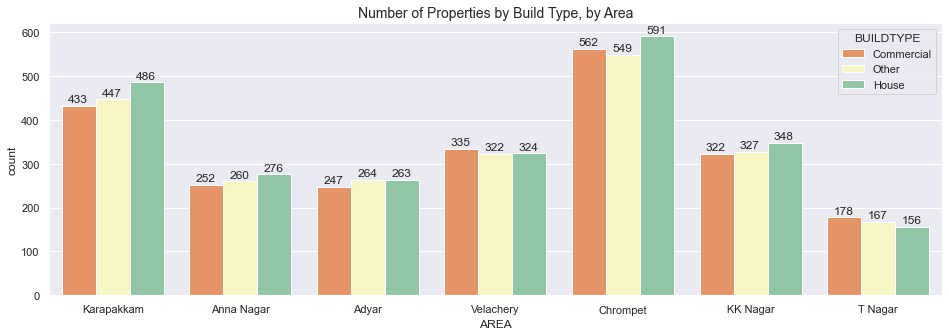

In [23]:
plt.figure(figsize=(16,5))
plt.title('Number of Properties by Build Type, by Area', fontdict={'fontsize':14})
ax = sns.countplot(x='AREA', hue='BUILDTYPE', palette="Spectral", data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+8))

plt.show()

Observations:
- Chrompet has highest number of properties overall, followed by Karapakkam
- T Nagar has the lowest number of overall properties
- Chrompet, Karapakkam, KK Nagar, & Anna Nagar have higher proportion of Residential properties 
- T Nagar, & Velachery have higher proportion of commercial properties


<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

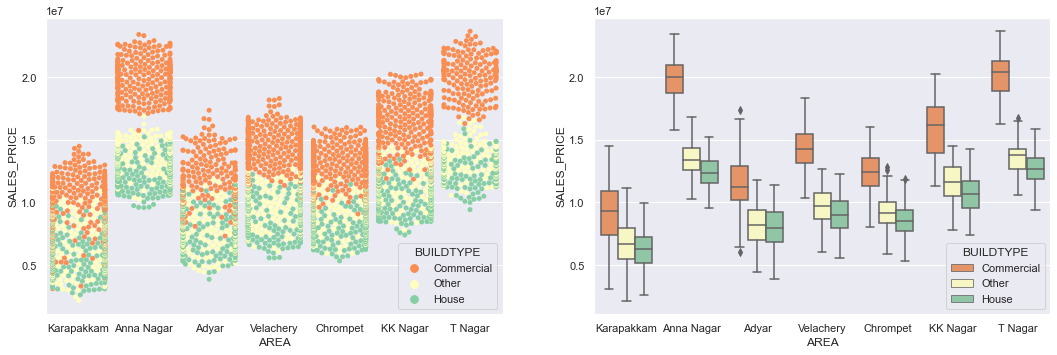

In [24]:
plt.figure(figsize=(18,12))
sns.set_theme()

plt.subplot(2,2,1)
sns.swarmplot(data=df, x="AREA", y="SALES_PRICE", hue="BUILDTYPE", palette="Spectral")

plt.subplot(2,2,2)
sns.boxplot(data=df, x="AREA", y="SALES_PRICE", hue="BUILDTYPE", palette="Spectral")

- T Nagar and Anna Nagar Area have high Sales Price.
- Karapakam Area has low Sales Price comparitively.

### 4. Square Feet

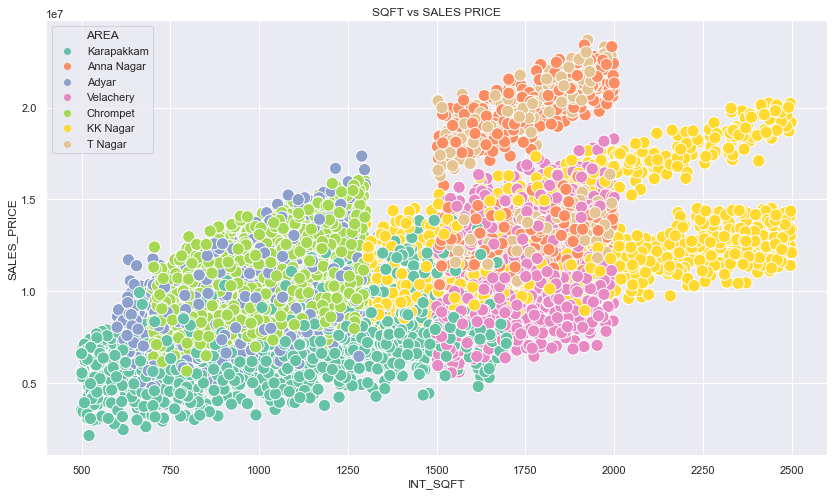

In [25]:
## Sq feet vs sale price
plt.figure(figsize=(14,8))
sns.set_theme()

sns.scatterplot(x='INT_SQFT', y='SALES_PRICE', hue='AREA', palette="Set2",s=150, data=df)
plt.title('SQFT vs SALES PRICE')
plt.show()

Observations:
- Sales Price increases with increase in square feet
- KK Nagar has some of the largest square feet area houses
- Anna Nagar and T Nagar have highest Sales Price in the 1500-2000 square feet range.
- Karapakkam area indicates lowest Sales Price comparitively

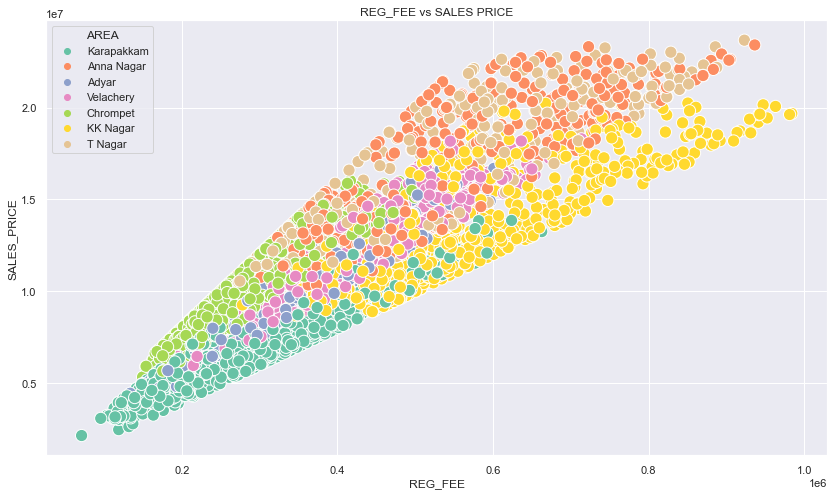

In [26]:
plt.figure(figsize=(14,8))
sns.set_theme()

sns.scatterplot(x='REG_FEE', y='SALES_PRICE', hue='AREA', palette="Set2",s=150, data=df)
plt.title('REG_FEE vs SALES PRICE')
plt.show()

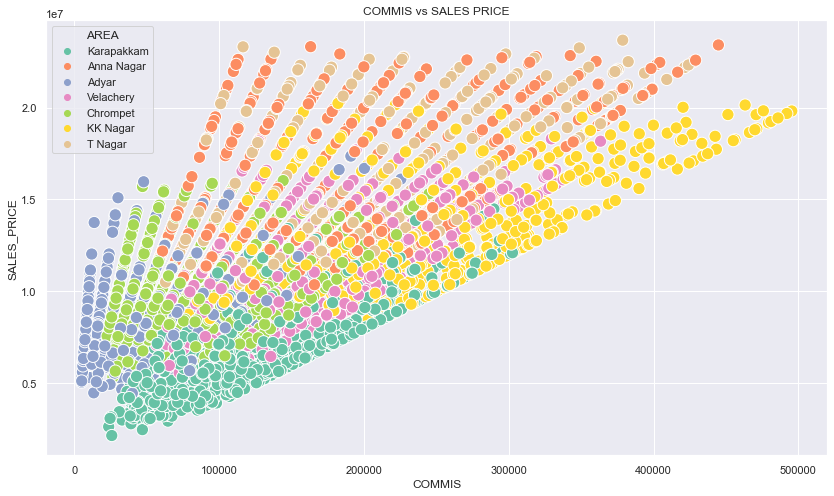

In [27]:
plt.figure(figsize=(14,8))
sns.set_theme()

sns.scatterplot(x='COMMIS', y='SALES_PRICE', hue='AREA', palette="Set2",s=150, data=df)
plt.title('COMMIS vs SALES PRICE')
plt.show()

### 5. Main Road Distance from the house

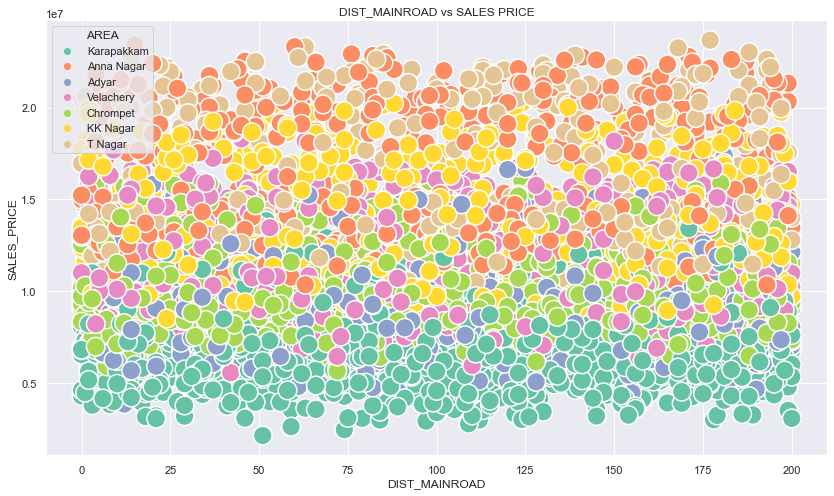

In [28]:
plt.figure(figsize=(14,8))
sns.set_theme()

sns.scatterplot(x='DIST_MAINROAD', y='SALES_PRICE', hue='AREA', palette="Set2",s=350, data=df)
plt.title('DIST_MAINROAD vs SALES PRICE')
plt.show()

Observations:
- Contrary to belief main road distance does not indicate any variation in the Sales Price of Houses.
- The Price is similar for the Houses having shorter and longer Main Road Distance.

### 6. Rooms, Bedrooms, Bathrooms & Parking facility

<AxesSubplot:xlabel='PARK_FACIL', ylabel='count'>

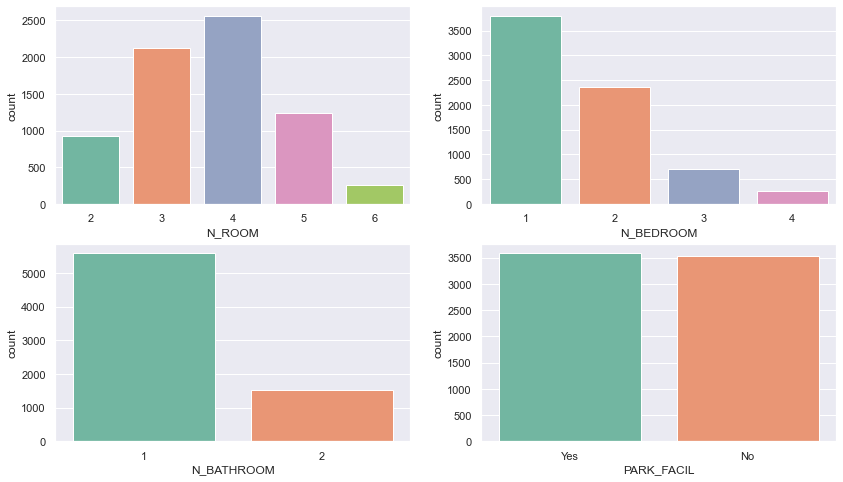

In [29]:
plt.figure(figsize=(14,8))
sns.set_theme()

plt.subplot(2,2,1)
sns.countplot(data=df, x="N_ROOM", palette="Set2")

plt.subplot(2,2,2)
sns.countplot(data=df, x="N_BEDROOM", palette="Set2")

plt.subplot(2,2,3)
sns.countplot(data=df, x="N_BATHROOM", palette="Set2")

plt.subplot(2,2,4)
sns.countplot(data=df, x="PARK_FACIL", palette="Set2")

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

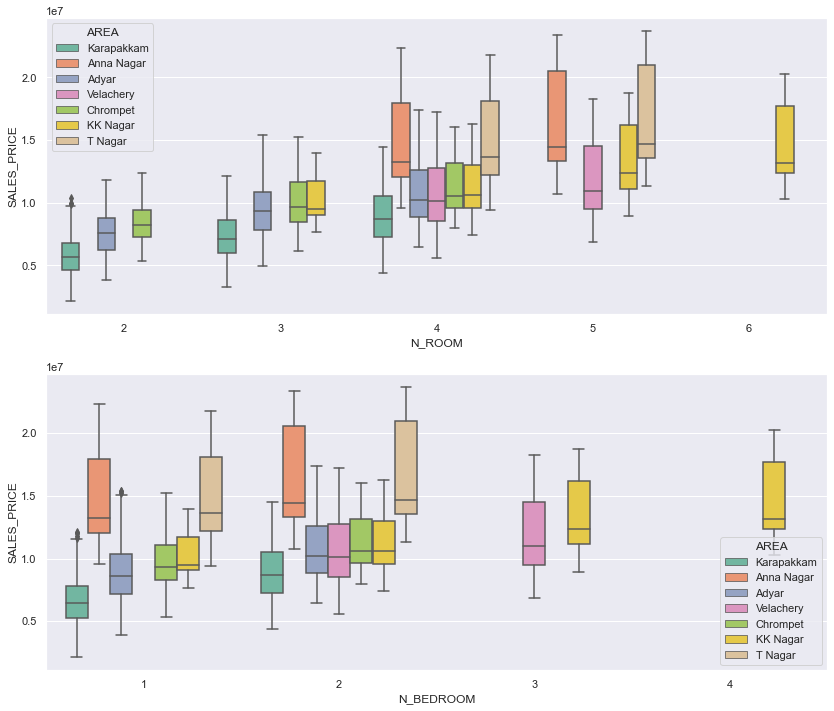

In [30]:
plt.figure(figsize=(14,12))
sns.set_theme()

plt.subplot(2,1,1)
sns.boxplot(data=df, x="N_ROOM", y="SALES_PRICE", hue="AREA", palette="Set2")

plt.subplot(2,1,2)
sns.boxplot(data=df, x="N_BEDROOM", y="SALES_PRICE", hue="AREA", palette="Set2")

How the Sales Price Depends On Number of Rooms ?
- Increase in rooms count increases the Sales Price of the house
- Houses having a total four and five Rooms in the areas of Anna Nagar,Velacherry,KK Nagar and T Nagar have high sales price.
- Houses having two to four rooms in the area of Chrompet has high sales price.

How the Sales Price Depends On Number of Bedrooms ?
- Increase in the no of bedroom increases the sales price
- KK Nagar is the only area containing houses with bedroom count ranging from 1 to 4.
- Out of all Anna Nagar and T Nagar area houses with two bedroom have high sales price

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

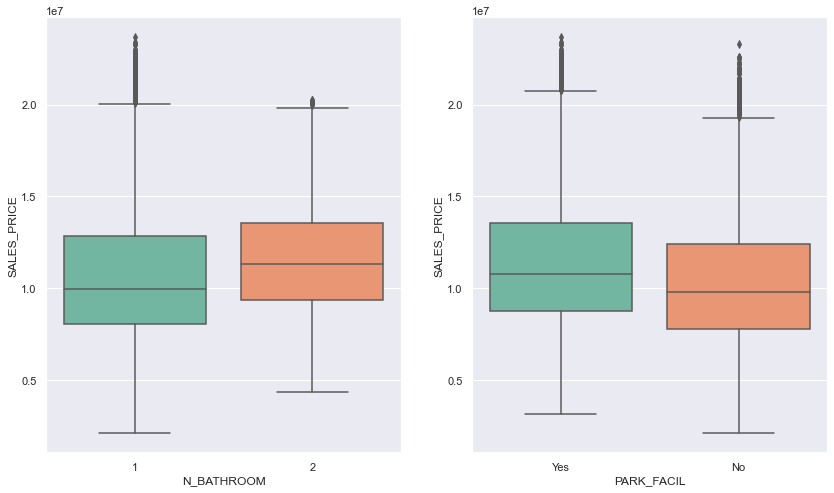

In [31]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="N_BATHROOM", y="SALES_PRICE", palette="Set2")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="PARK_FACIL", y="SALES_PRICE", palette="Set2")

Observations:
- Increase in the number of bathrooms increases the sales price of the house.
- Houses provided with parking facility have higher sales price than houses without them.

<AxesSubplot:xlabel='MZZONE', ylabel='count'>

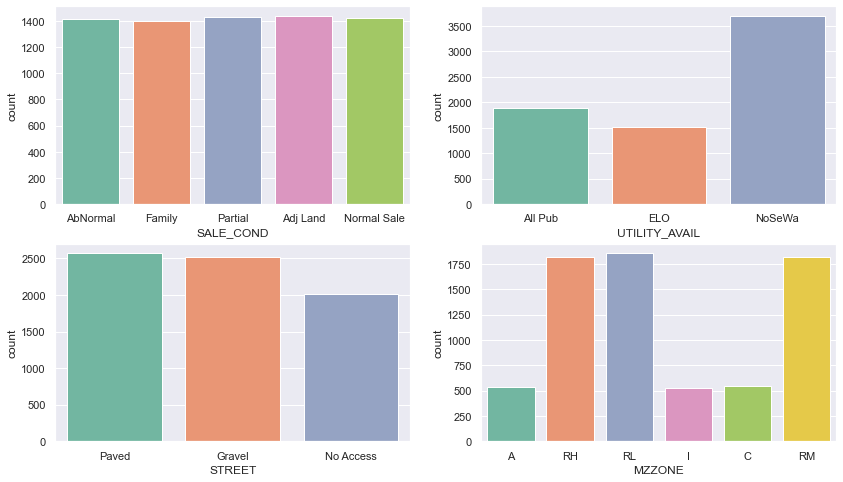

In [32]:
plt.figure(figsize=(14,8))
sns.set_theme()

plt.subplot(2,2,1)
sns.countplot(data=df, x="SALE_COND", palette="Set2")

plt.subplot(2,2,2)
sns.countplot(data=df, x="UTILITY_AVAIL", palette="Set2")

plt.subplot(2,2,3)
sns.countplot(data=df, x="STREET", palette="Set2")

plt.subplot(2,2,4)
sns.countplot(data=df, x="MZZONE", palette="Set2")

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

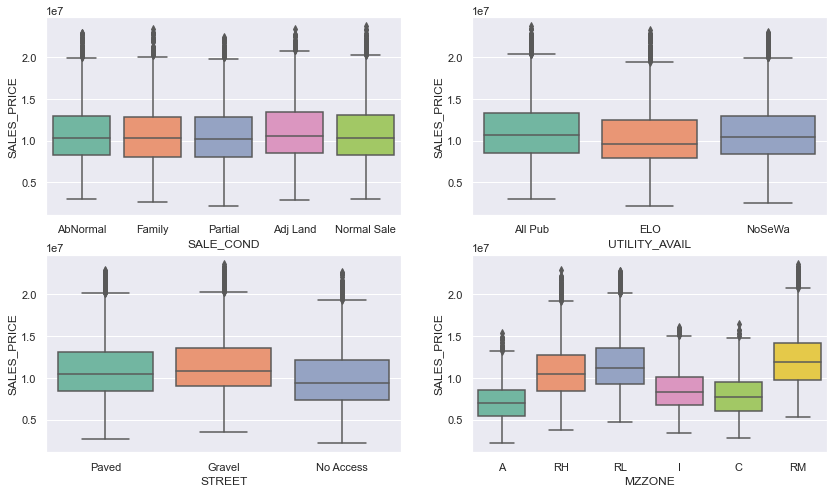

In [34]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.boxplot(data=df, x="SALE_COND", y="SALES_PRICE", palette="Set2")

plt.subplot(2,2,2)
sns.boxplot(data=df, x="UTILITY_AVAIL", y="SALES_PRICE", palette="Set2")

plt.subplot(2,2,3)
sns.boxplot(data=df, x="STREET", y="SALES_PRICE", palette="Set2")

plt.subplot(2,2,4)
sns.boxplot(data=df, x="MZZONE", y="SALES_PRICE", palette="Set2")

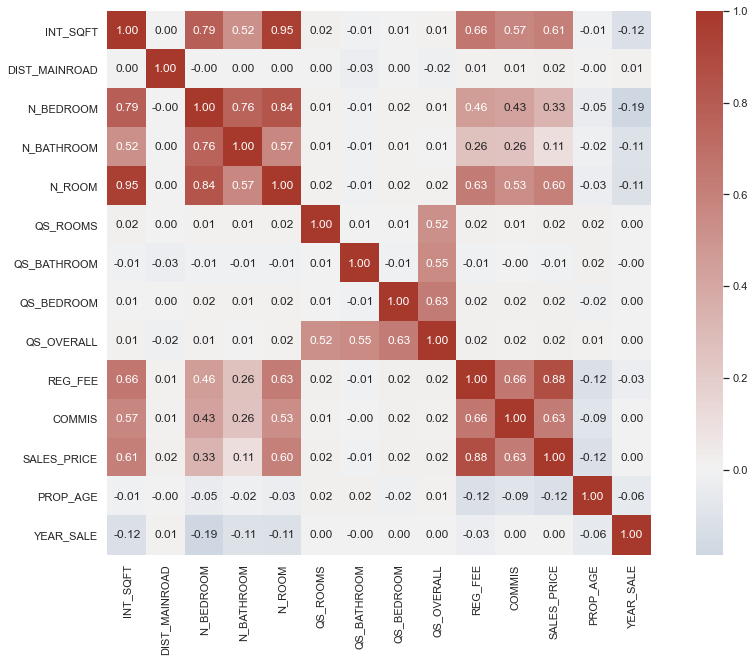

In [35]:
matrix = df.corr()
plt.figure(figsize=(16,10))
# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
_ = sns.heatmap(matrix, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

Observations:
- Sale Price has a significant linear relationship with square feet, number of rooms, registration fee and commission features.
- Square feet has a strong correlation with number of rooms, bathrooms, bedrooms, sale price, registration fee and commission features.

In [37]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PROP_AGE,YEAR_SALE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44,2011
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11,2006
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20,2012
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Other,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22,2010
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30,2009


In [38]:
df.drop(['PRT_ID','DIST_MAINROAD', 'DATE_SALE', 'DATE_BUILD','SALE_COND','QS_ROOMS','QS_BATHROOM','QS_BEDROOM',"QS_OVERALL"], axis=1, inplace=True)

In [39]:
df = pd.get_dummies(df)
df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE,PROP_AGE,YEAR_SALE,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other,UTILITY_AVAIL_All Pub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,1,1,3,380000,144400,7600000,44,2011,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
1,1986,2,1,5,760122,304049,21717770,11,2006,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,909,1,1,3,421094,92114,13159200,20,2012,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,1855,3,2,5,356321,77042,9630290,22,2010,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
4,1226,1,1,3,237000,74063,7406250,30,2009,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0


In [40]:
# storing the Dependent Variables in X and Independent Variable in y
X = df.drop(columns=["SALES_PRICE"])
y = df["SALES_PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5687, 32), (1422, 32), (5687,), (1422,))

Feature Scaling

- It is necessary to scale the features for parametric models.

- Non parametric models like Random Forest and Decision Tree can handle unscaled data without any learning issue.

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
######################################
## Creating the function to fit models 
######################################
model_preds = []

def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred),4)
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
    model_preds.append([model_name, r2, mse, mae, rmse])
    print ("The R-Squared Value is         : ", r2)
    print("The Mean Squared error (MSE) is : ", mse)
    print("Root Mean Squared Error (RMSE)  : ", rmse)
    print("Mean Absolute Error (MAE) is    : ", mae)

#########################################
## Creating the model evaluation function 
######################################### 
def model_eval():
    preds = pd.DataFrame(model_preds)
    preds.columns = ["Mod_Name", "R2 Value", "MSE", "RMSE", "MAE"]
    return preds.sort_values(by="R2 Value", ascending=False)

In [44]:
## Linear Regression
print(f'\033[94mLinear Regression')
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
fit_model(lr_model, "Linear Regression")
print('-'* 50)

## Decision Trees
print(f'\033[94mDecision Trees')
dectree_model = DecisionTreeRegressor()
fit_model(dectree_model, "Decision Tree Regressor")
print('-'* 50)

## Random Forest
print(f'\033[94mRandom Forest')
randfor_model = RandomForestRegressor()
fit_model(randfor_model, "Random Forest Regressor")
print('-'* 50)

## XG Boost
print(f'\033[94mXG Boost')
XGB_model = xgb.XGBRFRegressor()
fit_model(XGB_model, "XG Boost")
print('-'*50)

## KNN
print(f'\033[94mKNN')
knn_model = KNeighborsRegressor(n_neighbors=6)
fit_model(knn_model, "K-Neigbors Regressor")

Linear Regression
The R-Squared Value is         :  0.9639
The Mean Squared error (MSE) is :  490180792594.3701
Root Mean Squared Error (RMSE)  :  700129.1257
Mean Absolute Error (MAE) is    :  524801.7257
--------------------------------------------------
Decision Trees
The R-Squared Value is         :  0.9452
The Mean Squared error (MSE) is :  743762936755.8721
Root Mean Squared Error (RMSE)  :  862416.9159
Mean Absolute Error (MAE) is    :  660012.6864
--------------------------------------------------
Random Forest
The R-Squared Value is         :  0.9738
The Mean Squared error (MSE) is :  356285882635.2092
Root Mean Squared Error (RMSE)  :  596896.8777
Mean Absolute Error (MAE) is    :  473157.6952
--------------------------------------------------
XG Boost
The R-Squared Value is         :  0.938
The Mean Squared error (MSE) is :  841816658538.3617
Root Mean Squared Error (RMSE)  :  917505.6722
Mean Absolute Error (MAE) is    :  734197.4996
----------------------------------------

In [45]:
model_eval()

,Mod_Name,R2 Value,MSE,RMSE,MAE
2,Random Forest Regressor,0.9738,3.562859e+11,473157.6952,596896.8777
0,Linear Regression,0.9639,4.901808e+11,524801.7257,700129.1257
1,Decision Tree Regressor,0.9452,7.437629e+11,660012.6864,862416.9159
4,K-Neigbors Regressor,0.9401,8.130176e+11,689465.4313,901674.8847
3,XG Boost,0.9380,8.418167e+11,734197.4996,917505.6722


In [46]:
## Predict the model with test data
## We select random forest regressor, since it has better R2 value
y_pred = randfor_model.predict(X_test)

In [47]:
## extracting the output
out=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [48]:
result.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE,PROP_AGE,YEAR_SALE,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other,UTILITY_AVAIL_All Pub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,Sale_Price_actual,Sale_Price_pred
1,1986,2,1,5,760122,304049,21717770,11,2006,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,21717770,21221177.6
6,1167,1,1,3,263152,33955,8488790,28,2007,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,8488790,9113587.1
8,771,1,1,2,257578,33236,8308970,34,2011,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,8308970,8448936.8
9,1635,2,1,4,323346,121255,8083650,15,2006,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,8083650,8945858.7
12,1196,1,1,3,289554,35097,8774370,19,2010,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,8774370,9515911.2


In [49]:
out.head(10)

,Sale_Price_actual,Sale_Price_pred
3913,13376150,13206605.00
2726,12857440,12313318.60
6220,19124310,18185425.70
2716,4905000,5376862.95
5459,13534450,12986110.80
4168,10048510,10609932.50
779,10283850,10053312.20
5096,9079950,9210372.70
4806,10415200,9892764.40
1328,21050860,21440281.60


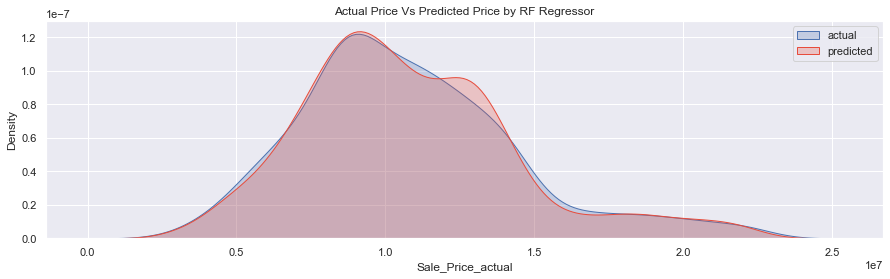

In [50]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=result, x='Sale_Price_actual', label='actual', shade=True)
sns.kdeplot(data=result, x='Sale_Price_pred', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by RF Regressor")
plt.legend()
plt.show()

In [51]:
rf = randfor_model
original_feature_list = list(df.columns)

In [52]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: REG_FEE              Importance: 0.76
Variable: AREA_KK Nagar        Importance: 0.05
Variable: INT_SQFT             Importance: 0.03
Variable: PARK_FACIL_Yes       Importance: 0.03
Variable: AREA_Adyar           Importance: 0.02
Variable: AREA_Chrompet        Importance: 0.02
Variable: N_BATHROOM           Importance: 0.01
Variable: COMMIS               Importance: 0.01
Variable: AREA_Anna Nagar      Importance: 0.01
Variable: AREA_Karapakkam      Importance: 0.01
Variable: N_BEDROOM            Importance: 0.0
Variable: N_ROOM               Importance: 0.0
Variable: SALES_PRICE          Importance: 0.0
Variable: PROP_AGE             Importance: 0.0
Variable: YEAR_SALE            Importance: 0.0
Variable: AREA_T Nagar         Importance: 0.0
Variable: AREA_Velachery       Importance: 0.0
Variable: PARK_FACIL_No        Importance: 0.0
Variable: BUILDTYPE_Commercial Importance: 0.0
Variable: BUILDTYPE_House      Importance: 0.0
Variable: BUILDTYPE_Other      Importance: 0.0
Var